# Acme Corp Data Analysis

This notebook analyzes the three synthetic datasets for Acme Corp:
1. User Details
2. Streaming Analytics
3. Ad Campaign Data

In [3]:
!pip3 install pandas
!pip3 install numpy
!pip3 install matplotlib
!pip3 install seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime



Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 68.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 67.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 78.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8/8 [matplotlib]8 [matplotlib]
Defaulting to user installation because normal site-packages is not writeable


Matplotlib is building the font cache; this may take a moment.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', '{:.2f}'.format)

# Set plot style
plt.style.use('default')
sns.set_palette('husl')

## Load Datasets

In [5]:
# Load user details
users = pd.read_csv('user_details/user_details.csv')
print(f"Users dataset: {users.shape[0]} rows, {users.shape[1]} columns")

# Load streaming analytics
streaming = pd.read_csv('streaming_analytics/streaming_analytics.csv')
content = pd.read_csv('streaming_analytics/content_library.csv')
print(f"Streaming dataset: {streaming.shape[0]} rows, {streaming.shape[1]} columns")
print(f"Content library: {content.shape[0]} rows, {content.shape[1]} columns")

# Load ad campaign data
campaigns = pd.read_csv('ad_campaign_data/campaigns.csv')
performance = pd.read_csv('ad_campaign_data/campaign_performance.csv')
attribution = pd.read_csv('ad_campaign_data/attribution_data.csv')
print(f"Campaigns dataset: {campaigns.shape[0]} rows, {campaigns.shape[1]} columns")
print(f"Performance dataset: {performance.shape[0]} rows, {performance.shape[1]} columns")
print(f"Attribution dataset: {attribution.shape[0]} rows, {attribution.shape[1]} columns")

Users dataset: 10000 rows, 17 columns
Streaming dataset: 50000 rows, 18 columns
Content library: 20 rows, 8 columns
Campaigns dataset: 100 rows, 11 columns
Performance dataset: 10000 rows, 17 columns
Attribution dataset: 5000 rows, 11 columns


## Data Overview

In [6]:
# User demographics summary
print("User Demographics Summary:")
print(f"Active users: {users['is_active'].sum()} ({users['is_active'].mean()*100:.1f}%)")
print(f"\nSubscription Plan Distribution:")
print(users['subscription_plan'].value_counts())
print(f"\nAge Statistics:")
print(users['age'].describe())

User Demographics Summary:
Active users: 9129 (91.3%)

Subscription Plan Distribution:
subscription_plan
Premium         3143
Standard        2992
Basic           2238
Premium Plus    1627
Name: count, dtype: int64

Age Statistics:
count   10000.00
mean       34.83
std        11.11
min        18.00
25%        26.00
50%        34.00
75%        42.00
max        80.00
Name: age, dtype: float64


In [7]:
# Streaming behavior summary
print("Streaming Behavior Summary:")
print(f"Average completion rate: {streaming['completion_rate'].mean():.1f}%")
print(f"Average watch duration: {streaming['watch_duration_minutes'].mean():.1f} minutes")
print(f"\nContent Type Distribution:")
print(streaming['content_type'].value_counts())
print(f"\nTop 5 Most Watched Content:")
top_content = streaming.groupby('title').size().sort_values(ascending=False).head()
print(top_content)

Streaming Behavior Summary:
Average completion rate: 85.6%
Average watch duration: 76.7 minutes

Content Type Distribution:
content_type
Movie          24998
TV Show        17496
Documentary     7506
Name: count, dtype: int64

Top 5 Most Watched Content:
title
Love in Paris           2606
Space Academy           2561
Dark Waters             2558
Detective Chronicles    2548
Historical Secrets      2547
dtype: int64


## Cross-Dataset Analysis

### Query 1: Premium Users' Sci-Fi Viewing Habits

In [8]:
# Join users with streaming data
user_streaming = pd.merge(users[users['subscription_plan'].isin(['Premium', 'Premium Plus'])], 
                         streaming[streaming['genre'] == 'Sci-Fi'], 
                         on='user_id')

print("Premium/Premium Plus Users Watching Sci-Fi Content:")
print(f"Total viewing sessions: {len(user_streaming)}")
print(f"Unique users: {user_streaming['user_id'].nunique()}")
print(f"Average completion rate: {user_streaming['completion_rate'].mean():.1f}%")
print(f"Average lifetime value: ${user_streaming.groupby('user_id')['lifetime_value'].first().mean():.2f}")

# Top sci-fi content for premium users
print("\nTop Sci-Fi Content for Premium Users:")
print(user_streaming['title'].value_counts().head())

Premium/Premium Plus Users Watching Sci-Fi Content:
Total viewing sessions: 3785
Unique users: 2605
Average completion rate: 85.6%
Average lifetime value: $587.02

Top Sci-Fi Content for Premium Users:
title
Space Academy       1305
The Algorithm       1244
Robot Revolution    1236
Name: count, dtype: int64


### Query 2: Campaign ROI by User Demographics

In [9]:
# Join attribution data with users and campaigns
attribution_users = pd.merge(attribution, users[['user_id', 'age', 'subscription_plan', 'country']], on='user_id')
attribution_full = pd.merge(attribution_users, campaigns[['campaign_id', 'campaign_name', 'campaign_type', 'objective']], on='campaign_id')

# Calculate age groups
attribution_full['age_group'] = pd.cut(attribution_full['age'], bins=[0, 24, 34, 44, 54, 100], labels=['18-24', '25-34', '35-44', '45-54', '55+'])

# Conversion rates by age group and campaign type
conversion_by_age = attribution_full.groupby(['age_group', 'campaign_type'])['converted'].agg(['sum', 'count', 'mean'])
conversion_by_age.columns = ['conversions', 'total_touchpoints', 'conversion_rate']
conversion_by_age['conversion_rate'] = conversion_by_age['conversion_rate'] * 100

print("Conversion Rates by Age Group and Campaign Type:")
print(conversion_by_age.sort_values('conversion_rate', ascending=False).head(10))

Conversion Rates by Age Group and Campaign Type:
                         conversions  total_touchpoints  conversion_rate
age_group campaign_type                                                 
55+       Video                   10                 47            21.28
          Display                  6                 32            18.75
35-44     Native                  54                302            17.88
25-34     Video                   48                280            17.14
35-44     Display                 26                152            17.11
25-34     Social Media            46                271            16.97
35-44     Search                  50                305            16.39
55+       Native                   7                 43            16.28
25-34     Display                 27                166            16.27
18-24     Native                  27                169            15.98


/var/folders/18/bxsd8sqs7q7bpmpn4lk0pw4m0000gn/T/ipykernel_10085/3599933615.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  conversion_by_age = attribution_full.groupby(['age_group', 'campaign_type'])['converted'].agg(['sum', 'count', 'mean'])


### Query 3: Content Performance vs. Ad Spend

In [10]:
# Find campaigns promoting specific content
content_campaigns = campaigns[campaigns['promoted_content_id'].notna()]

# Calculate total spend per campaign
campaign_spend = performance.groupby('campaign_id')['spend'].sum().reset_index()
campaign_spend.columns = ['campaign_id', 'total_spend']

# Join with content campaigns
content_campaign_spend = pd.merge(content_campaigns, campaign_spend, on='campaign_id')

# Get viewing data for promoted content
promoted_content_views = streaming[streaming['content_id'].isin(content_campaign_spend['promoted_content_id'])]
content_view_stats = promoted_content_views.groupby('content_id').agg({
    'session_id': 'count',
    'completion_rate': 'mean',
    'rating_given': 'mean'
}).reset_index()
content_view_stats.columns = ['promoted_content_id', 'total_views', 'avg_completion_rate', 'avg_rating']

# Merge everything together
content_performance = pd.merge(content_campaign_spend, content_view_stats, on='promoted_content_id')
content_performance['cost_per_view'] = content_performance['total_spend'] / content_performance['total_views']

print("Content Promotion Performance:")
print(content_performance[['promoted_content_title', 'campaign_type', 'total_spend', 'total_views', 'cost_per_view', 'avg_completion_rate']].sort_values('cost_per_view'))

Content Promotion Performance:
   promoted_content_title campaign_type  total_spend  total_views  \
35          Space Academy         Email    932232.51         2561   
88       Robot Revolution        Native    949061.96         2515   
87      The Last Frontier        Native    932868.42         2437   
28      Medical Emergency         Email    937253.73         2446   
1             Dark Waters         Email    982125.28         2558   
22         Comedy Central        Native    964219.80         2497   
39     Historical Secrets  Social Media    989686.09         2547   
51          Space Academy        Search   1006684.16         2561   
33            Dark Waters       Display   1013326.72         2558   
59          Love in Paris  Social Media   1053390.83         2606   
61            Dark Waters  Social Media   1039105.84         2558   
69            City Lights  Social Media   1020328.62         2498   
58            Future Wars         Email   1032054.89         2500   
48 

### Query 4: User Journey Analysis - From Ad to Subscription

In [11]:
# Find users who converted through campaigns
converted_users = attribution[attribution['converted'] == True]['user_id'].unique()

# Get their user details
converted_user_details = users[users['user_id'].isin(converted_users)]

# Get their streaming behavior
converted_user_streaming = streaming[streaming['user_id'].isin(converted_users)]

# Compare converted users vs all users
print("Converted Users vs All Users Comparison:")
print(f"\nSubscription Plan Distribution - Converted Users:")
print(converted_user_details['subscription_plan'].value_counts(normalize=True) * 100)
print(f"\nSubscription Plan Distribution - All Users:")
print(users['subscription_plan'].value_counts(normalize=True) * 100)

print(f"\nAverage Lifetime Value:")
print(f"Converted Users: ${converted_user_details['lifetime_value'].mean():.2f}")
print(f"All Users: ${users['lifetime_value'].mean():.2f}")

print(f"\nStreaming Behavior:")
print(f"Avg sessions per converted user: {len(converted_user_streaming) / len(converted_users):.1f}")
print(f"Avg sessions per all users: {len(streaming) / users['user_id'].nunique():.1f}")

Converted Users vs All Users Comparison:

Subscription Plan Distribution - Converted Users:
subscription_plan
Premium        31.46
Standard       27.39
Basic          23.03
Premium Plus   18.12
Name: proportion, dtype: float64

Subscription Plan Distribution - All Users:
subscription_plan
Premium        31.43
Standard       29.92
Basic          22.38
Premium Plus   16.27
Name: proportion, dtype: float64

Average Lifetime Value:
Converted Users: $462.17
All Users: $440.32

Streaming Behavior:
Avg sessions per converted user: 5.6
Avg sessions per all users: 5.0


### Query 5: Device Usage Patterns Across User Segments

In [12]:
# Join users with streaming to analyze device usage patterns
user_device_streaming = pd.merge(
    users[['user_id', 'subscription_plan', 'age', 'country', 'primary_device']],
    streaming[['user_id', 'device_type', 'video_quality', 'completion_rate']],
    on='user_id'
)

# Check if primary device matches actual usage
user_device_streaming['device_match'] = user_device_streaming['primary_device'] == user_device_streaming['device_type']

# Analyze by subscription plan
device_quality_by_plan = user_device_streaming.groupby(['subscription_plan', 'video_quality']).size().unstack(fill_value=0)
device_quality_by_plan_pct = device_quality_by_plan.div(device_quality_by_plan.sum(axis=1), axis=0) * 100

print("Video Quality Distribution by Subscription Plan:")
print(device_quality_by_plan_pct)

print("\nDevice Usage Consistency (Primary Device Match):")
device_consistency = user_device_streaming.groupby('subscription_plan')['device_match'].mean() * 100
print(device_consistency)

Video Quality Distribution by Subscription Plan:
video_quality        4K    HD    SD
subscription_plan                  
Basic             25.12 59.63 15.24
Premium           24.83 60.14 15.03
Premium Plus      24.72 60.64 14.64
Standard          24.86 59.54 15.60

Device Usage Consistency (Primary Device Match):
subscription_plan
Basic          100.00
Premium        100.00
Premium Plus   100.00
Standard       100.00
Name: device_match, dtype: float64


## Visualizations

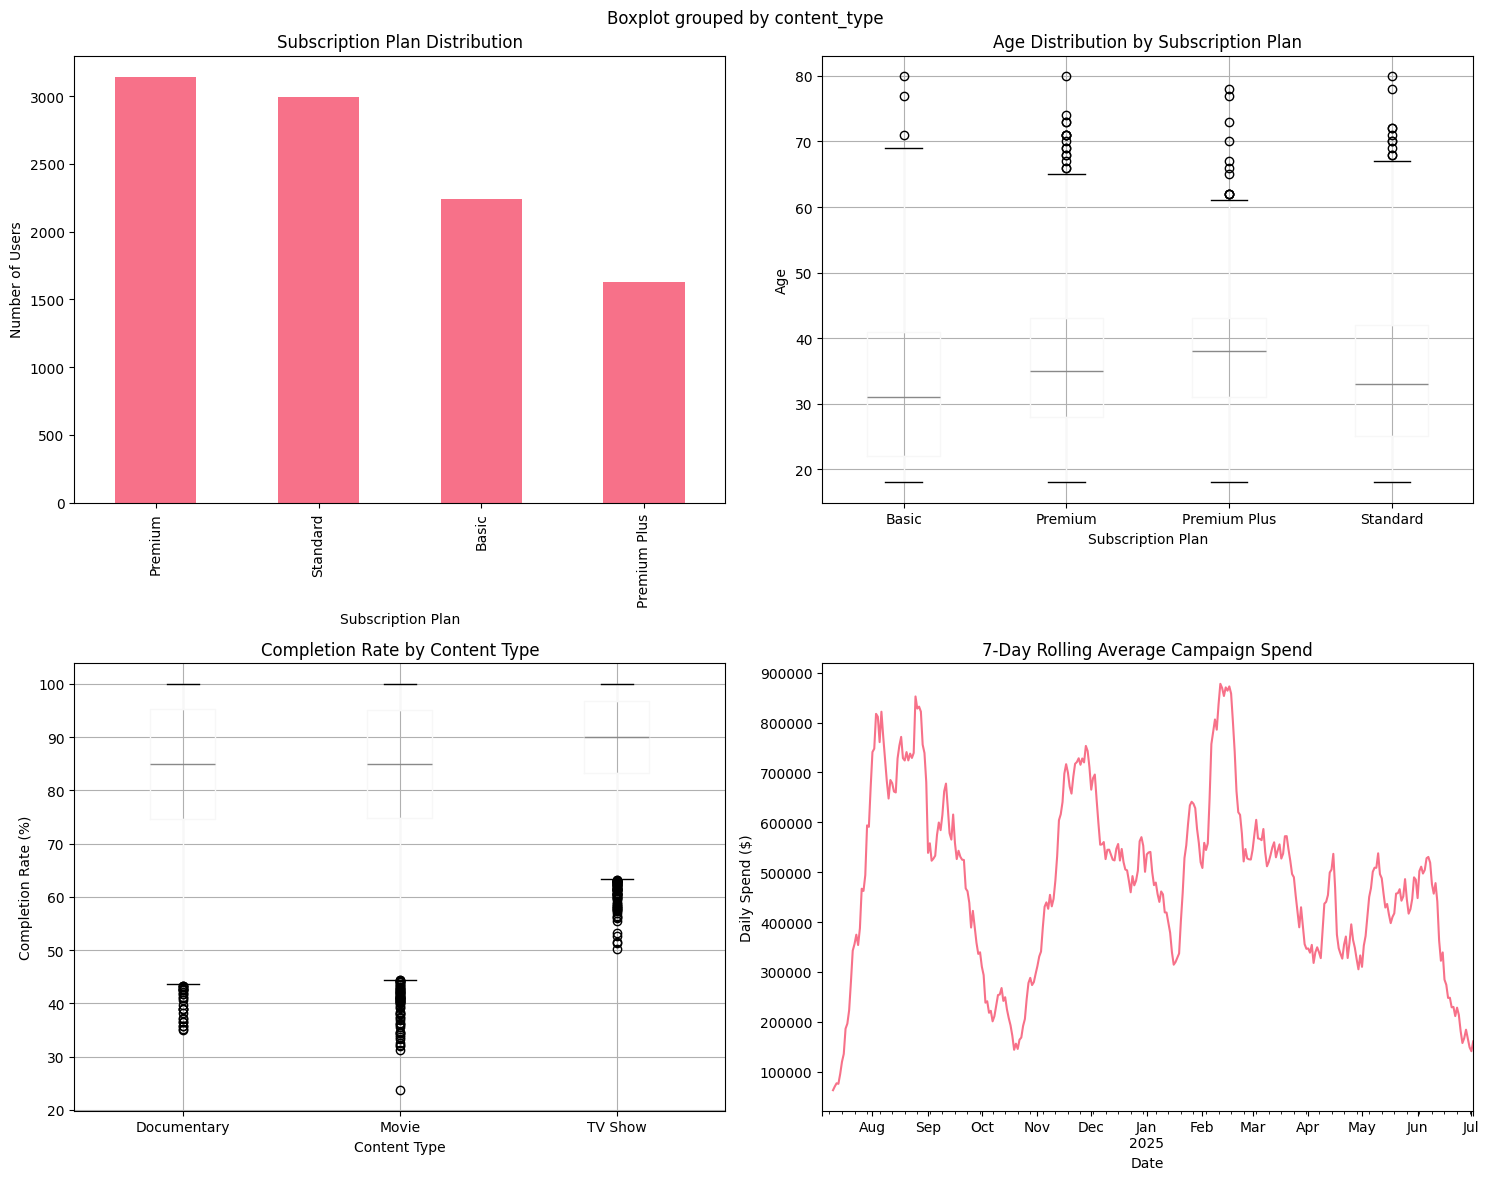

In [13]:
# Create a figure with multiple subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Subscription Plan Distribution
users['subscription_plan'].value_counts().plot(kind='bar', ax=axes[0,0])
axes[0,0].set_title('Subscription Plan Distribution')
axes[0,0].set_xlabel('Subscription Plan')
axes[0,0].set_ylabel('Number of Users')

# 2. Age Distribution by Subscription Plan
users.boxplot(column='age', by='subscription_plan', ax=axes[0,1])
axes[0,1].set_title('Age Distribution by Subscription Plan')
axes[0,1].set_xlabel('Subscription Plan')
axes[0,1].set_ylabel('Age')

# 3. Completion Rate by Content Type
streaming.boxplot(column='completion_rate', by='content_type', ax=axes[1,0])
axes[1,0].set_title('Completion Rate by Content Type')
axes[1,0].set_xlabel('Content Type')
axes[1,0].set_ylabel('Completion Rate (%)')

# 4. Campaign Performance Over Time
performance['date'] = pd.to_datetime(performance['date'])
daily_spend = performance.groupby('date')['spend'].sum().rolling(7).mean()
daily_spend.plot(ax=axes[1,1])
axes[1,1].set_title('7-Day Rolling Average Campaign Spend')
axes[1,1].set_xlabel('Date')
axes[1,1].set_ylabel('Daily Spend ($)')

plt.tight_layout()
plt.show()

## Advanced Cross-Dataset Query: Full User Value Analysis

In [14]:
# Create a comprehensive user value analysis combining all datasets

# 1. Calculate user engagement metrics from streaming
user_engagement = streaming.groupby('user_id').agg({
    'session_id': 'count',
    'watch_duration_minutes': 'sum',
    'completion_rate': 'mean',
    'rating_given': 'count'
}).reset_index()
user_engagement.columns = ['user_id', 'total_sessions', 'total_watch_minutes', 'avg_completion_rate', 'ratings_given']

# 2. Calculate user attribution metrics
user_attribution = attribution.groupby('user_id').agg({
    'campaign_id': 'nunique',
    'converted': 'max',
    'conversion_value': 'sum'
}).reset_index()
user_attribution.columns = ['user_id', 'campaigns_touched', 'ever_converted', 'total_conversion_value']

# 3. Merge all user data
user_complete = pd.merge(users, user_engagement, on='user_id', how='left')
user_complete = pd.merge(user_complete, user_attribution, on='user_id', how='left')

# Fill NaN values
user_complete.fillna({
    'total_sessions': 0,
    'total_watch_minutes': 0,
    'avg_completion_rate': 0,
    'ratings_given': 0,
    'campaigns_touched': 0,
    'ever_converted': False,
    'total_conversion_value': 0
}, inplace=True)

# Calculate user score
user_complete['engagement_score'] = (
    user_complete['total_sessions'] * 0.3 +
    user_complete['total_watch_minutes'] * 0.01 +
    user_complete['avg_completion_rate'] * 0.5 +
    user_complete['ratings_given'] * 2
)

# Top valuable users
print("Top 10 Most Valuable Users (by multiple metrics):")
top_users = user_complete.nlargest(10, 'engagement_score')[[
    'user_id', 'subscription_plan', 'lifetime_value', 'total_sessions', 
    'total_watch_minutes', 'avg_completion_rate', 'ever_converted', 'engagement_score'
]]
print(top_users)

# Segment analysis
print("\nUser Segments Analysis:")
segments = user_complete.groupby(['subscription_plan', 'ever_converted']).agg({
    'user_id': 'count',
    'lifetime_value': 'mean',
    'engagement_score': 'mean',
    'total_sessions': 'mean'
}).round(2)
segments.columns = ['user_count', 'avg_lifetime_value', 'avg_engagement_score', 'avg_sessions']
print(segments)

Top 10 Most Valuable Users (by multiple metrics):
          user_id subscription_plan  lifetime_value  total_sessions  \
9680  USR00009681      Premium Plus          160.93           13.00   
5981  USR00005982             Basic          242.73           15.00   
4591  USR00004592             Basic          458.49           13.00   
2084  USR00002085             Basic           89.90           12.00   
4867  USR00004868          Standard          209.85           14.00   
6239  USR00006240           Premium          467.74           13.00   
163   USR00000164          Standard          209.85           16.00   
9526  USR00009527      Premium Plus          620.73           12.00   
5262  USR00005263             Basic          242.73           11.00   
2188  USR00002189           Premium          737.59           12.00   

      total_watch_minutes  avg_completion_rate  ever_converted  \
9680              1170.57                93.77           False   
5981              1275.67           

/var/folders/18/bxsd8sqs7q7bpmpn4lk0pw4m0000gn/T/ipykernel_10085/57596639.py:25: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  user_complete.fillna({


## Summary Statistics

In [15]:
print("=== ACME CORP DATA SUMMARY ===")
print(f"\nTotal Users: {len(users):,}")
print(f"Active Users: {users['is_active'].sum():,} ({users['is_active'].mean()*100:.1f}%)")
print(f"Total Streaming Sessions: {len(streaming):,}")
print(f"Total Content Items: {len(content)}")
print(f"Total Ad Campaigns: {len(campaigns)}")
print(f"Total Campaign Spend: ${performance['spend'].sum():,.2f}")
print(f"\nRevenue Metrics:")
print(f"Total User Lifetime Value: ${users['lifetime_value'].sum():,.2f}")
print(f"Average User Lifetime Value: ${users['lifetime_value'].mean():.2f}")
print(f"Revenue from Attributed Conversions: ${attribution['conversion_value'].sum():,.2f}")

=== ACME CORP DATA SUMMARY ===

Total Users: 10,000
Active Users: 9,129 (91.3%)
Total Streaming Sessions: 50,000
Total Content Items: 20
Total Ad Campaigns: 100
Total Campaign Spend: $173,316,351.15

Revenue Metrics:
Total User Lifetime Value: $4,403,182.99
Average User Lifetime Value: $440.32
Revenue from Attributed Conversions: $12,462.83
